# IMPORT DATA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib.pyplot import xticks
%matplotlib inline

In [3]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
df=pd.read_csv("/Users/admin/UOP AMLDM/Untitled Folder/Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# DATA UNDERSTANDING

In [6]:
df.shape

(167, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [9]:
df['exports'] = df['exports'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100
df['health'] = df['health'] * df['gdpp']/100

In [10]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


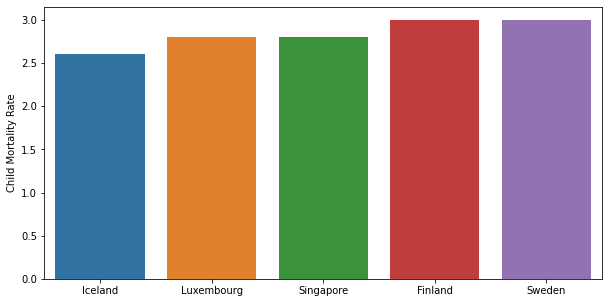

In [11]:
plt.figure(figsize = (10,5))
child_mort_bottom5 = df[['country','child_mort']].sort_values('child_mort', ascending = True).head(5)
child_mort_chart = sns.barplot(x='country', y='child_mort', data= child_mort_bottom5)
child_mort_chart.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.show()

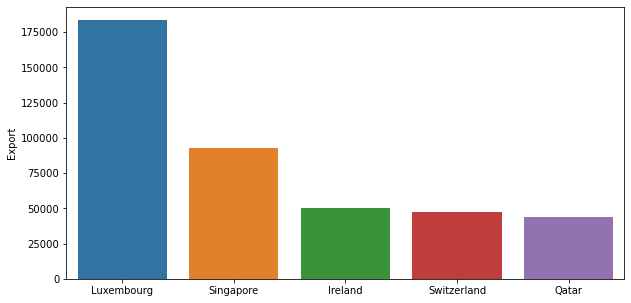

In [12]:
plt.figure(figsize = (10,5))
exports_top5 = df[['country','exports']].sort_values('exports', ascending = False).head(5)
exports_chart = sns.barplot(x='country', y='exports', data= exports_top5)
exports_chart.set(xlabel = '', ylabel= 'Export')
plt.show()

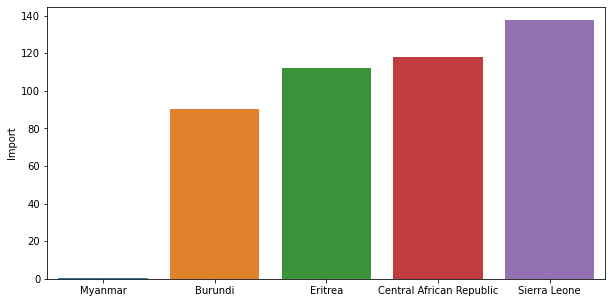

In [13]:
plt.figure(figsize = (10,5))
imports_bottom5 = df[['country','imports']].sort_values('imports', ascending = True).head(5)
imports_chart = sns.barplot(x='country', y='imports', data= imports_bottom5)
imports_chart.set(xlabel = '', ylabel= 'Import')
plt.show()

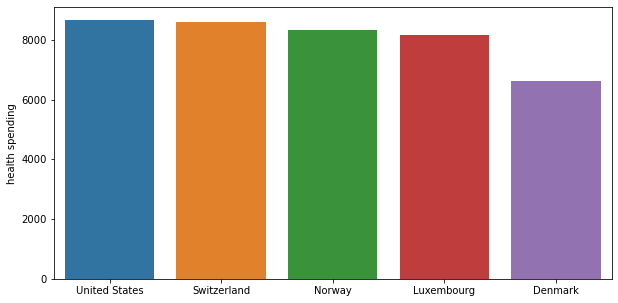

In [14]:
plt.figure(figsize = (10,5))
health_top5 = df[['country','health']].sort_values('health', ascending = False).head(5)
health_chart = sns.barplot(x='country', y='health', data= health_top5)
health_chart.set(xlabel = '', ylabel= 'health spending')
plt.show()

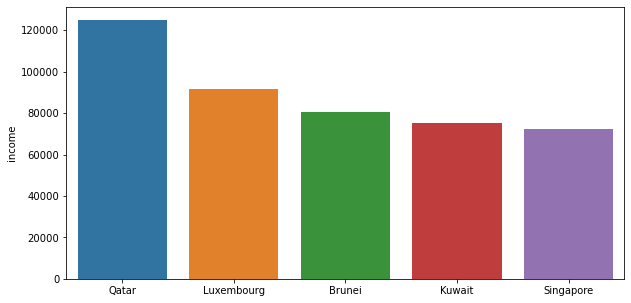

In [15]:
plt.figure(figsize = (10,5))
income_top5 = df[['country','income']].sort_values('income', ascending = False).head(5)
income_chart = sns.barplot(x='country', y='income', data= income_top5)
income_chart.set(xlabel = '', ylabel= 'income')
plt.show()

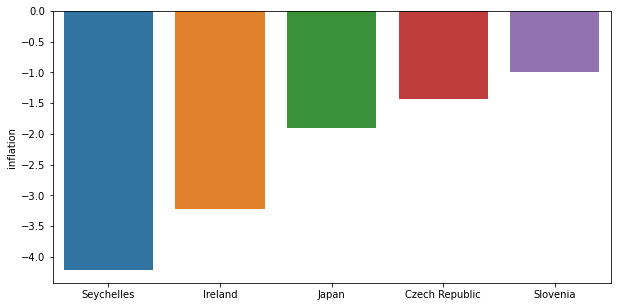

In [16]:
plt.figure(figsize = (10,5))
inflation_bottom5 = df[['country','inflation']].sort_values('inflation', ascending = True).head(5)
inflation_chart = sns.barplot(x='country', y='inflation', data= inflation_bottom5)
inflation_chart.set(xlabel = '', ylabel= 'inflation')
plt.show()

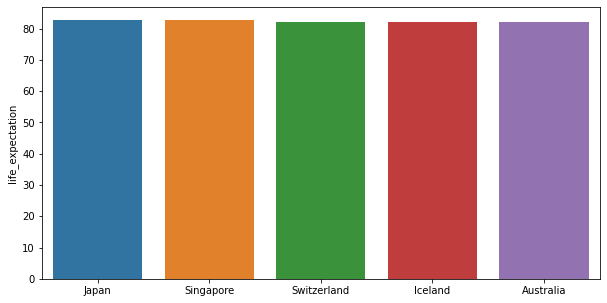

In [17]:
plt.figure(figsize = (10,5))
life_expec_top5 = df[['country','life_expec']].sort_values('life_expec', ascending = False).head(5)
life_expec_chart = sns.barplot(x='country', y='life_expec', data= life_expec_top5)
life_expec_chart.set(xlabel = '', ylabel= 'life_expectation')
plt.show()

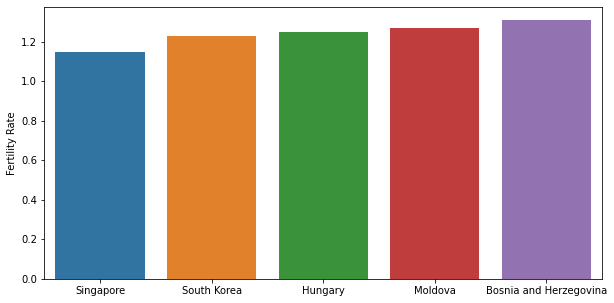

In [18]:
plt.figure(figsize = (10,5))
total_fer_bottom5 = df[['country','total_fer']].sort_values('total_fer', ascending = True).head(5)
total_fer_chart = sns.barplot(x='country', y='total_fer', data= total_fer_bottom5)
total_fer_chart.set(xlabel = '', ylabel= 'Fertility Rate')
plt.show()

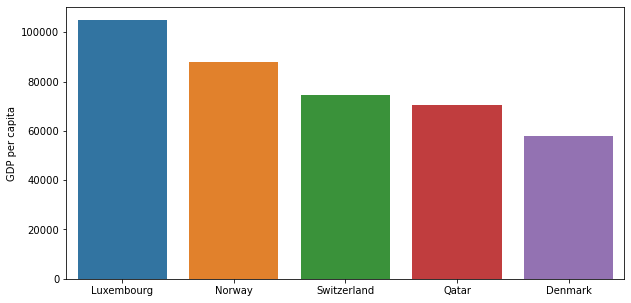

In [19]:
plt.figure(figsize = (10,5))
gdpp_top5 = df[['country','gdpp']].sort_values('gdpp', ascending = False).head(5)
gdpp_chart = sns.barplot(x='country', y='gdpp', data= gdpp_top5)
gdpp_chart.set(xlabel = '', ylabel= 'GDP per capita')
plt.show()

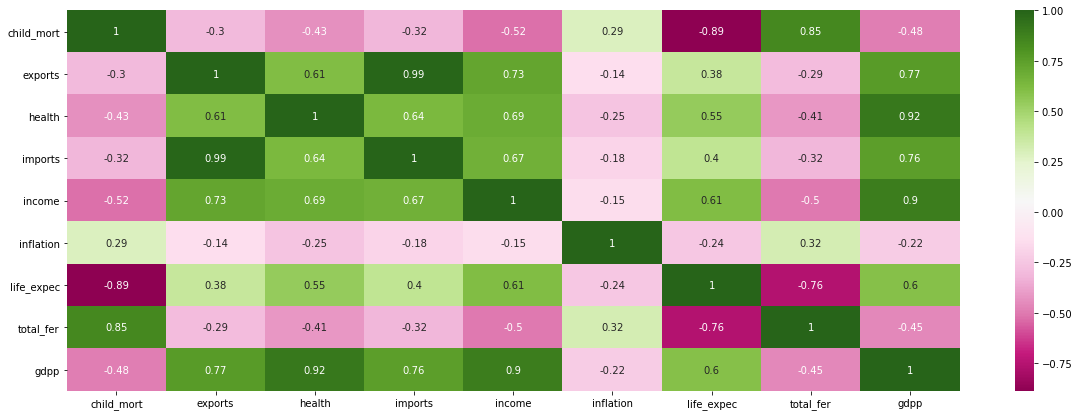

In [20]:
plt.figure(figsize = (20,7))
sns.heatmap(df.corr(), cmap="PiYG", annot = True)
plt.show()

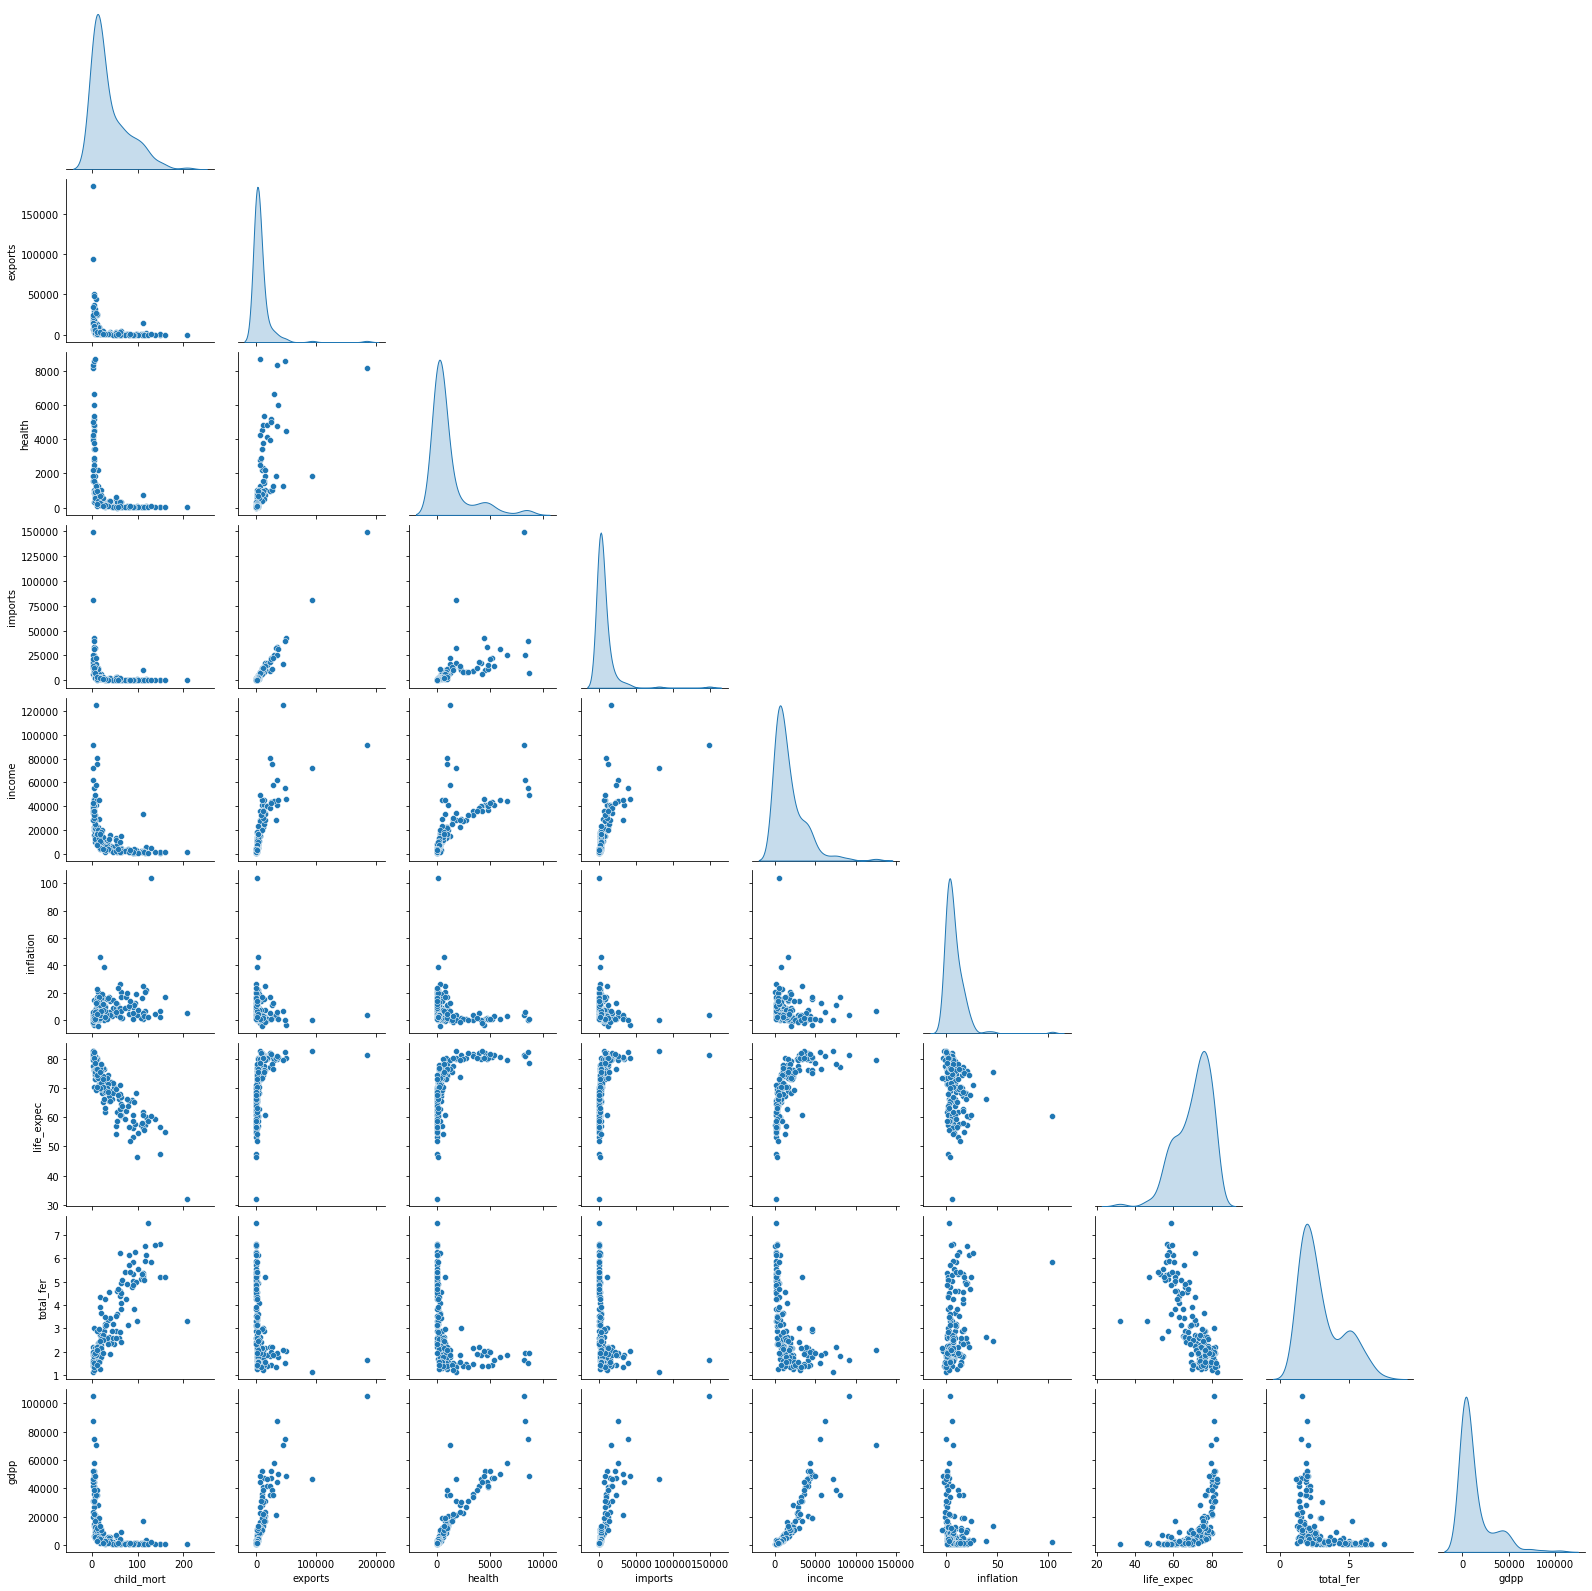

In [21]:
sns.pairplot(df,corner=True,diag_kind="kde")
plt.show()

In [22]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# DATA PREPROCESSING

In [23]:
data_scaled = StandardScaler().fit_transform(df.drop(['country'], axis=1))

In [24]:
data_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [25]:
df1 = pd.DataFrame(data_scaled, columns = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'])
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


# DATA MODELLING

# K-MEANS

In [26]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

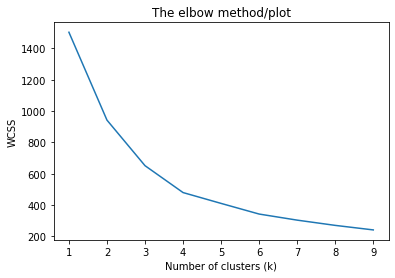

In [27]:
plt.plot(range(1,10), wcss)
plt.title('The elbow method/plot')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [28]:
kmeans = KMeans(n_clusters=3)
kmeans_model = kmeans.fit(df1) 

test_kmeans = kmeans_model.predict(df1)
test_kmeans 

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [29]:
df['Kmeans_cluster'] = kmeans_model.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans_cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


In [30]:
df.Kmeans_cluster.value_counts(ascending=True)

0    28
2    48
1    91
Name: Kmeans_cluster, dtype: int64

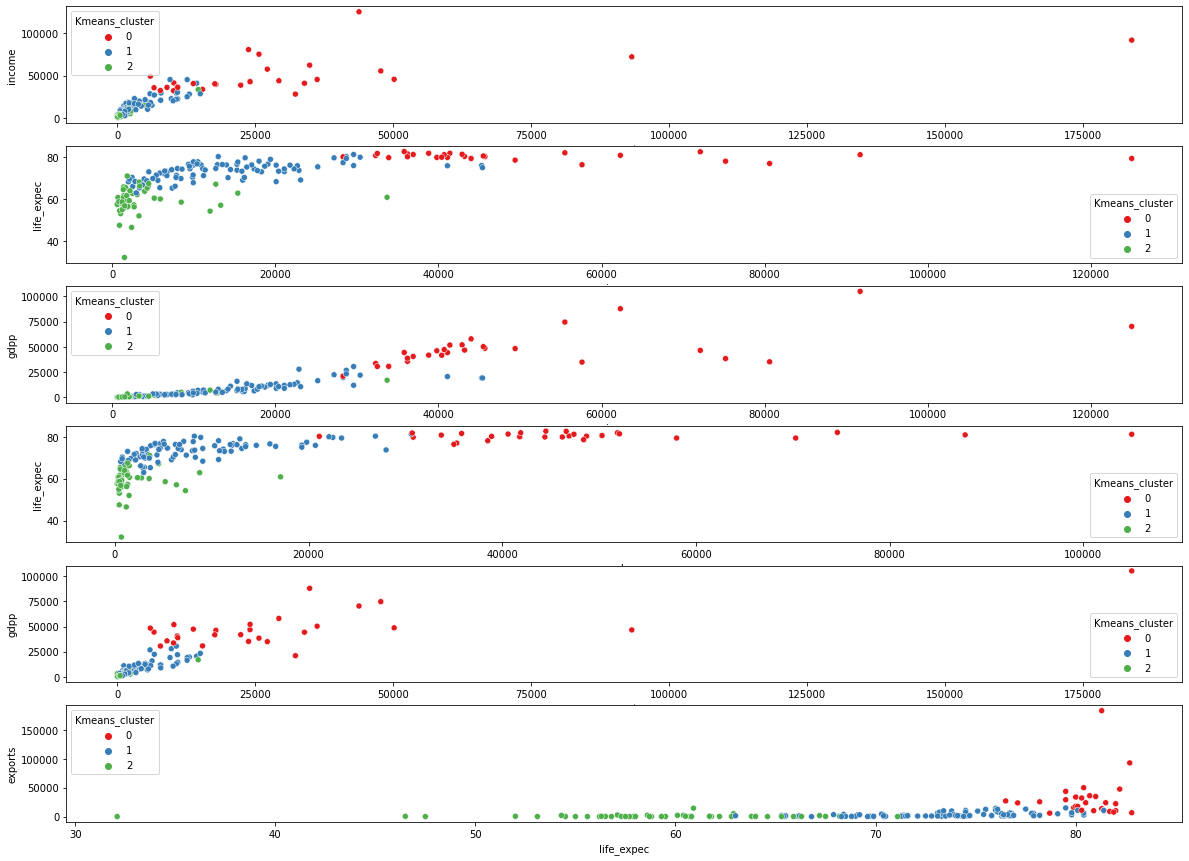

In [31]:
plt.figure(figsize = (20,15))
plt.subplot(6,1,1)
sns.scatterplot(x = 'exports', y = 'income',hue='Kmeans_cluster',data = df,legend='full',palette="Set1")
plt.subplot(6,1,2)
sns.scatterplot(x = 'income', y = 'life_expec',hue='Kmeans_cluster', data = df,legend='full',palette="Set1")
plt.subplot(6,1,3)
sns.scatterplot(x = 'income', y = 'gdpp',hue='Kmeans_cluster', data=df,legend='full',palette="Set1")
plt.subplot(6,1,4)
sns.scatterplot(x = 'gdpp', y = 'life_expec',hue='Kmeans_cluster', data=df,legend='full',palette="Set1")
plt.subplot(6,1,5)
sns.scatterplot(x = 'exports', y = 'gdpp',hue='Kmeans_cluster', data=df,legend='full',palette="Set1")
plt.subplot(6,1,6)
sns.scatterplot(x = 'life_expec', y = 'exports',hue='Kmeans_cluster', data=df,legend='full',palette="Set1")
plt.show()

In [32]:
df[['gdpp','income','life_expec','exports','Kmeans_cluster']].groupby('Kmeans_cluster').mean()

,gdpp,income,life_expec,exports
Kmeans_cluster,,,,
0,48114.285714,50178.571429,80.514286,31038.239286
1,7979.912088,13968.021978,73.460440,3604.149434
2,1909.208333,3897.354167,59.239583,879.063521


In [33]:
df[df['Kmeans_cluster']==1].sort_values(by = ['gdpp','income','life_expec','exports'], ascending = [False, False, False,False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans_cluster
74,Israel,4.6,10710.0,2334.78,10067.4,29600,1.770,81.4,3.03,30600,1
10,Bahamas,13.8,9800.0,2209.20,12236.0,22900,-0.393,73.8,1.86,28000,1
60,Greece,3.9,5944.9,2770.70,8258.3,28700,0.673,80.4,1.48,26900,1
135,Slovenia,3.2,15046.2,2201.94,14718.6,28700,-0.987,79.5,1.57,23400,1
122,Portugal,3.9,6727.5,2475.00,8415.0,27200,0.643,79.8,1.39,22500,1


In [34]:
df[df['Kmeans_cluster']==2].sort_values(by = ['gdpp','income','life_expec','exports'], ascending = [False, False, False,False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans_cluster
49,Equatorial Guinea,111.0,14671.80,766.080,10071.90,33700,24.90,60.9,5.21,17100,2
55,Gabon,63.7,5048.75,306.250,1653.75,15400,16.60,62.9,4.08,8750,2
137,South Africa,53.7,2082.08,650.832,1994.72,12000,6.35,54.3,2.59,7280,2
21,Botswana,52.5,2768.60,527.050,3257.55,13300,8.92,57.1,2.88,6350,2
108,Namibia,56.0,2480.82,351.882,3150.33,8460,3.56,58.6,3.60,5190,2


In [35]:
df[df['Kmeans_cluster']==0].sort_values(by = ['gdpp','income','life_expec','exports'], ascending = [False, False, False,False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans_cluster
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000,0
114,Norway,3.2,34856.6,8323.44,25023.0,62300,5.950,81.0,1.95,87800,0
145,Switzerland,4.5,47744.0,8579.00,39761.8,55500,0.317,82.2,1.52,74600,0
123,Qatar,9.0,43796.9,1272.43,16731.4,125000,6.980,79.5,2.07,70300,0
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,0


# Hierachical Clustering

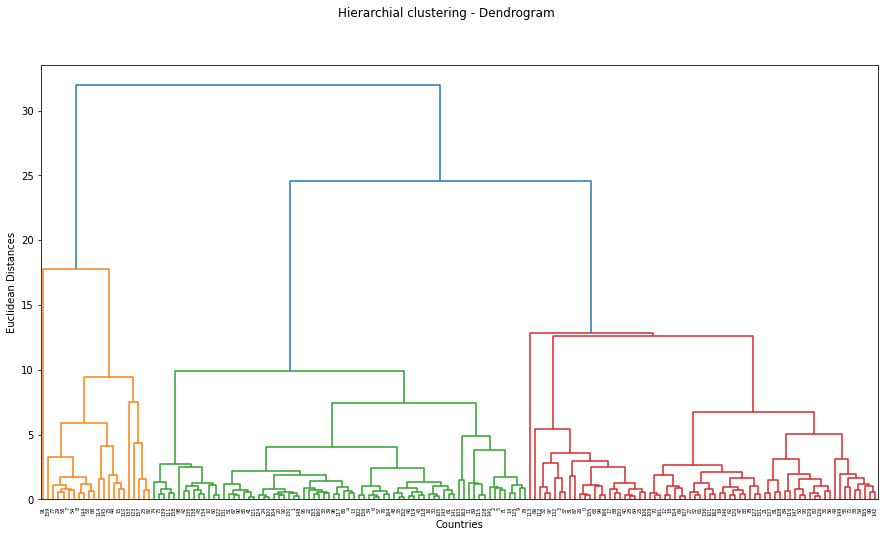

In [36]:
import scipy.cluster.hierarchy as sch
fig=plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method = 'ward'))
plt.suptitle('Hierarchial clustering - Dendrogram')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distances')
plt.show()

In [37]:
from sklearn.cluster import AgglomerativeClustering

In [38]:
hc= AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

In [39]:
test_hc = hc.fit_predict(data_scaled)
test_hc

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 1,
       2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2,
       0, 2, 2, 1, 2, 1, 1, 2, 1, 0, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 1, 1, 0, 1, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2,
       1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 0, 1, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 2, 0, 2, 0, 2, 1, 1, 2, 2, 1, 1], dtype=int64)

In [40]:
df['HC_cluster'] = test_hc
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans_cluster,HC_cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1,2


In [41]:
df.HC_cluster.value_counts(ascending=True)

0    22
1    70
2    75
Name: HC_cluster, dtype: int64

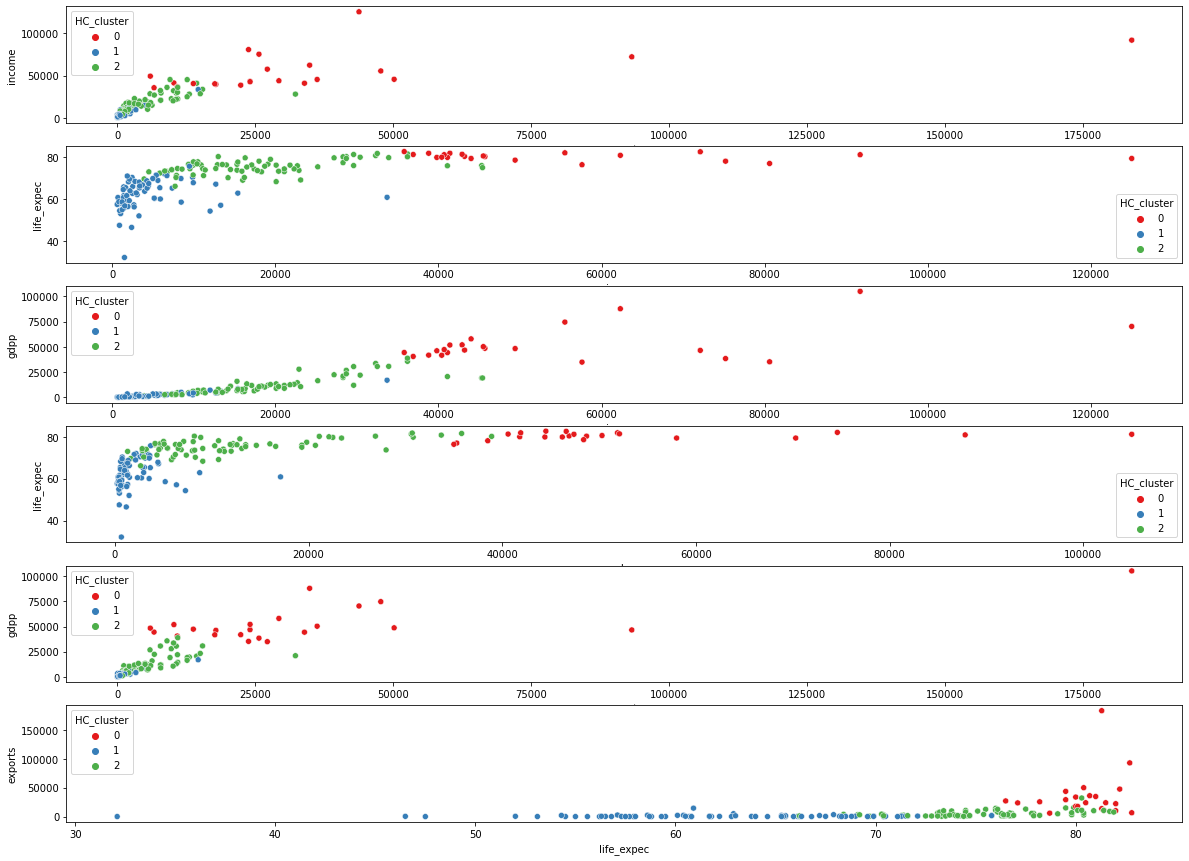

In [42]:
plt.figure(figsize = (20,15))
plt.subplot(6,1,1)
sns.scatterplot(x = 'exports', y = 'income',hue='HC_cluster',data = df,legend='full',palette="Set1")
plt.subplot(6,1,2)
sns.scatterplot(x = 'income', y = 'life_expec',hue='HC_cluster', data = df,legend='full',palette="Set1")
plt.subplot(6,1,3)
sns.scatterplot(x = 'income', y = 'gdpp',hue='HC_cluster', data=df,legend='full',palette="Set1")
plt.subplot(6,1,4)
sns.scatterplot(x = 'gdpp', y = 'life_expec',hue='HC_cluster', data=df,legend='full',palette="Set1")
plt.subplot(6,1,5)
sns.scatterplot(x = 'exports', y = 'gdpp',hue='HC_cluster', data=df,legend='full',palette="Set1")
plt.subplot(6,1,6)
sns.scatterplot(x = 'life_expec', y = 'exports',hue='HC_cluster', data=df,legend='full',palette="Set1")
plt.show()

In [43]:
df[['gdpp','income','life_expec','exports','HC_cluster']].groupby('HC_cluster').mean()

,gdpp,income,life_expec,exports
HC_cluster,,,,
0,52554.545455,54800.000000,80.427273,35604.322727
1,2022.628571,4328.471429,62.241429,871.003679
2,11563.066667,18060.933333,75.420000,5266.373200


In [44]:
df[df['HC_cluster']==0].sort_values(by = ['gdpp','income','life_expec','exports'], ascending = [False, False, False,False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans_cluster,HC_cluster
91,Luxembourg,2.8,183750.0,8158.50,149100.0,91700,3.620,81.3,1.63,105000,0,0
114,Norway,3.2,34856.6,8323.44,25023.0,62300,5.950,81.0,1.95,87800,0,0
145,Switzerland,4.5,47744.0,8579.00,39761.8,55500,0.317,82.2,1.52,74600,0,0
123,Qatar,9.0,43796.9,1272.43,16731.4,125000,6.980,79.5,2.07,70300,0,0
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,0,0


In [45]:
df[df['HC_cluster']==2].sort_values(by = ['gdpp','income','life_expec','exports'], ascending = [False, False, False,False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans_cluster,HC_cluster
158,United Kingdom,5.2,10969.8,3749.96,11981.2,36200,1.570,80.3,1.92,38900,0,2
75,Italy,4.0,9021.6,3411.74,9737.6,36200,0.319,81.7,1.46,35800,0,2
111,New Zealand,6.2,10211.1,3403.70,9436.0,32300,3.730,80.9,2.17,33700,0,2
42,Cyprus,3.6,15461.6,1838.76,17710.0,33900,2.010,79.9,1.42,30800,0,2
139,Spain,3.8,7828.5,2928.78,8227.6,32500,0.160,81.9,1.37,30700,0,2


In [46]:
df[df['HC_cluster']==1].sort_values(by = ['gdpp','income','life_expec','exports'], ascending = [False, False, False,False]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans_cluster,HC_cluster
49,Equatorial Guinea,111.0,14671.80,766.080,10071.90,33700,24.90,60.9,5.21,17100,2,1
55,Gabon,63.7,5048.75,306.250,1653.75,15400,16.60,62.9,4.08,8750,2,1
137,South Africa,53.7,2082.08,650.832,1994.72,12000,6.35,54.3,2.59,7280,2,1
21,Botswana,52.5,2768.60,527.050,3257.55,13300,8.92,57.1,2.88,6350,2,1
108,Namibia,56.0,2480.82,351.882,3150.33,8460,3.56,58.6,3.60,5190,2,1
